In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv('../AMZN.csv',index_col='Date',parse_dates=['Date'])
price_df = df.loc[:,['Adj Close']].copy()
price_df['daily_rtn'] = price_df['Adj Close'].pct_change()
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()

# 투자 성과 분석 지표

연평균 복리 수익률(Compound Annual Growth Rate, CAGR)

최대 낙폭(Maximum Draw Down, MDD)

변동성(Valaility, Vol)

샤프 지수(Sharpe ratio)

## 연평균 복리 수익률(CAGR)
 
 $$ (\frac{End Value }{ Begin Value}) ^ \frac{1} { Year} - 1 $$

In [54]:
# CAGR = (End_Value / Begin_Value)**(1/Number_of_Year)
# 252. (금융공학에서는 1년은 252영업일로 계산)

CAGR = price_df.loc['2019-06-24','st_rtn']**(252./len(price_df.index))-1
#or

CAGR = (price_df.loc['2020-09-16','Adj Close']
        /price_df.loc['1997-05-15','Adj Close'])**(252/len(price_df.index))-1


## 최대 낙폭(MDD)

$$ \frac{Trough Value - Peak Value}{Peak Value} $$

In [55]:
# MDD = (Trough_Value - Peak_Value)/Peak_Value

historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close']/historical_max - 1.0
MDD = daily_drawdown.min()

In [56]:
print(price_df['Adj Close'].cummax()[30:50])
price_df['Adj Close'][30:50]

Date
1997-06-27    1.958333
1997-06-30    1.958333
1997-07-01    1.958333
1997-07-02    1.958333
1997-07-03    1.958333
1997-07-07    2.000000
1997-07-08    2.302083
1997-07-09    2.322917
1997-07-10    2.562500
1997-07-11    2.562500
1997-07-14    2.562500
1997-07-15    2.562500
1997-07-16    2.562500
1997-07-17    2.562500
1997-07-18    2.562500
1997-07-21    2.562500
1997-07-22    2.562500
1997-07-23    2.562500
1997-07-24    2.562500
1997-07-25    2.562500
Name: Adj Close, dtype: float64


Date
1997-06-27    1.489583
1997-06-30    1.541667
1997-07-01    1.515625
1997-07-02    1.588542
1997-07-03    1.911458
1997-07-07    2.000000
1997-07-08    2.302083
1997-07-09    2.322917
1997-07-10    2.562500
1997-07-11    2.291667
1997-07-14    2.135417
1997-07-15    2.437500
1997-07-16    2.333333
1997-07-17    2.218750
1997-07-18    2.156250
1997-07-21    2.182292
1997-07-22    2.135417
1997-07-23    2.291667
1997-07-24    2.260417
1997-07-25    2.229167
Name: Adj Close, dtype: float64

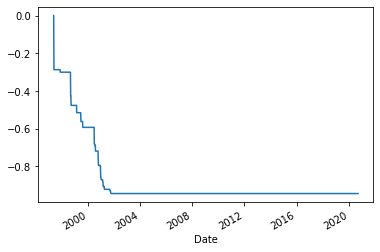

In [57]:
historical_dd = daily_drawdown.cummin()
historical_dd.plot()


##  변동성(VOL)

 $$ \sigma_P = \sigma_d * \sqrt{P}  $$
 
 $$\sigma_d: 일별 수익률의 표준편차, P: 영업일$$
 

In [58]:
# Vol : sigma_p = sigma_day * sqrt(P)  , sigma_day : 일별수익률의 표준편차 , P: 영업일 
VOL = np.std(price_df['daily_rtn'])*np.sqrt(252.)

## 샤프 지수 

$$ S_a = \frac {E[ R_a - R_b ]} {\sqrt{Var[R_a - R_b]}} $$
$$ R_a: 자산 수익률, R_b: 기준지표(benchmark) 수익률 $$

In [59]:
# 샤프 지수 : 위험 대비 수익성
# Sa = E[Ra - Rb]/sigma_a = E[Ra - Rb]/sqrt(var[Ra-Rb]) ,  Ra = 자산 수익률, Rb= 사후적 샤프 비율
Sharpe = np.mean(price_df['daily_rtn']) / np.std(price_df['daily_rtn']) * np.sqrt(252.)

In [60]:
print('CAGR: ',round(CAGR*100,2),'%')
print('Sharpe: ',round(Sharpe,2))
print('VOL: ',round(VOL*100,2),'%')
print('MDD: ',round(-1*MDD*100,2),'%')

CAGR:  37.13 %
Sharpe:  0.82
VOL:  58.96 %
MDD:  94.4 %


# 전통 퀸트 투자 전략 
 ## 평균회귀 전략 이용

# 볼린저 밴드

In [67]:
df = pd.read_csv('./algoTrade-master/data/us_etf_data/SPY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500


In [68]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6648.000000,6648.000000,6648.000000,6648.000000,6648.000000,6.648000e+03
mean,133.762935,134.541071,132.893598,133.759854,110.399391,8.440122e+07
std,59.488006,59.671285,59.277882,59.492056,64.113369,9.837713e+07
min,43.343750,43.531250,42.812500,43.406250,26.383823,5.200000e+03
25%,96.780937,97.735000,95.726562,96.921875,71.256485,6.966775e+06
50%,124.433750,125.335938,123.500000,124.312500,93.641503,5.709990e+07
75%,151.702503,152.514999,150.810624,151.791713,125.251474,1.229908e+08
max,296.040009,296.309998,293.760010,295.859985,294.427979,8.710263e+08


In [69]:
# 원본 데이터 훼손 방지를 위해 copy()함수 사용
price_df = df.loc[:,['Date','Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,1993-01-29,26.706757
1,1993-02-01,26.896694
2,1993-02-02,26.953669
3,1993-02-03,27.238594
4,1993-02-04,27.352570


In [70]:
price_df.set_index(['Date'],inplace=True)
price_df.head()

,Adj Close
Date,
1993-01-29,26.706757
1993-02-01,26.896694
1993-02-02,26.953669
1993-02-03,27.238594
1993-02-04,27.352570


In [71]:
price_df['center'] = price_df['Adj Close'].rolling(window=20).mean()
price_df.iloc[18:25]

,Adj Close,center
Date,,
1993-02-25,26.953669,NaN
1993-02-26,26.991682,26.910942
1993-03-01,26.915695,26.921389
1993-03-02,27.314577,26.942283
1993-03-03,27.428545,26.966027
1993-03-04,27.276592,26.967927
1993-03-05,27.200619,26.960329


In [72]:
price_df['ub'] = price_df['center'] + 2 * price_df['Adj Close'].rolling(window = 20).std()
price_df['lb'] = price_df['center'] - 2 * price_df['Adj Close'].rolling(window = 20).std()
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
1993-02-25,26.953669,NaN,NaN,NaN
1993-02-26,26.991682,26.910942,27.598068,26.223816
1993-03-01,26.915695,26.921389,27.601764,26.241013
1993-03-02,27.314577,26.942283,27.644772,26.239794
1993-03-03,27.428545,26.966027,27.701465,26.230589
1993-03-04,27.276592,26.967927,27.706519,26.229334
1993-03-05,27.200619,26.960329,27.685261,26.235397


In [73]:
n = 20
sigma = 2
def bollinger_band(price_df,n,sigma):
    bb = price_df.copy()
    bb['center'] = bb['Adj Close'].rolling(n).mean()
    bb['ub'] = bb['center'] + sigma * price_df['Adj Close'].rolling(n).std()
    bb['lb'] = bb['center'] - sigma * price_df['Adj Close'].rolling(n).std()
    return bb

bollinger = bollinger_band(price_df,n,sigma)

In [74]:
base_date = '2009-01-02'
sample = bollinger.loc[base_date:]
sample.head()

,Adj Close,center,ub,lb
Date,,,,
2009-01-02,75.099487,71.378963,74.538229,68.219698
2009-01-05,75.010582,71.711677,74.931608,68.491746
2009-01-06,75.511505,71.964058,75.543401,68.384716
2009-01-07,73.249435,71.980327,75.580937,68.379718
2009-01-08,73.548378,72.071645,75.736733,68.406557


In [75]:
# book : 진입/청산 신호가 발생할 때 우리가 취하는 행동을 기억할 데이터프레임
sample = price_df.loc[base_date:]
book = sample[['Adj Close']].copy()
book.head()

,Adj Close
Date,
2009-01-02,75.099487
2009-01-05,75.010582
2009-01-06,75.511505
2009-01-07,73.249435
2009-01-08,73.548378


In [76]:
def create_trade_book(sample):
    book = sample[['Adj Close']].copy()
    book['trade'] = ''
    return(book)

In [77]:
def tradings(sample, book):
    for i in sample.index:
        if sample.loc[i,'Adj Close']>sample.loc[i,'ub']:
            book.loc[i,'trade'] = ''
        elif sample.loc[i,'Adj Close']<sample.loc[i,'lb']:
            if book.shift(1).loc[i,'trade']=='buy':
                book.loc[i,'trade']='buy'
            else:
                book.loc[i,'trade']='buy'
        elif sample.loc[i,'Adj Close'] >= sample.loc[i,'lb'] and sample.loc[i,'ub'] >= sample.loc[i,'Adj Close']:
            if book.shift(1).loc[i,'trade']=='buy':
                book.loc[i,'trade']='buy'
            else:
                book.loc[i,'trade']=''
    return (book)             

In [78]:
book = tradings(sample,book)
book.tail(10)

,Adj Close,trade
Date,,
2019-06-11,287.501678,buy
2019-06-12,286.994171,buy
2019-06-13,288.178375,buy
2019-06-14,287.859955,buy
2019-06-17,287.969391,buy
2019-06-18,290.984741,buy
2019-06-19,291.641541,buy
2019-06-20,294.427979,buy
2019-06-21,294.000000,buy


In [79]:
def returns(book):
    rtn = 1.0
    book['return']=1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i,'trade'] == 'buy' and book.shift(1).loc[i,'trade']=='':
            buy = book.loc[i,'Adj Close']
            print('진입일: ',i,'long 진입가격: ',round(buy,2))
            
        elif book.loc[i,'trade'] == '' and book.shift(1).loc[i,'trade']=='buy':
            sell = book.loc[i,'Adj Close']
            rtn = (sell - buy) / buy + 1
            book.loc[i,'return'] = rtn
            print('청산일: ',i,'long 진입가격: ',round(buy,2),' | long 청산가격: ',round(sell,2),' | return: ',round(rtn,4))
        
        if book.loc[i,'trade']=='':
            buy = 0.0
            sell = 0.0
            
    acc_rtn = 1.0
    for i in book.index:
        rtn = book.loc[i,'return']
        acc_rtn = acc_rtn*rtn
        book.loc[i,'acc return'] = acc_rtn
        
    print('Accunulated return: ',round(acc_rtn,4))
    return(round(acc_rtn,4))

In [80]:
returns(book)

진입일:  2009-01-20 long 진입가격:  65.09
청산일:  2009-03-23 long 진입가격:  65.09  | long 청산가격:  66.9  | return:  1.0278
진입일:  2010-01-22 long 진입가격:  90.27
청산일:  2010-04-14 long 진입가격:  90.27  | long 청산가격:  100.58  | return:  1.1143
진입일:  2010-05-04 long 진입가격:  97.54
청산일:  2010-10-13 long 진입가격:  97.54  | long 청산가격:  98.86  | return:  1.0136
진입일:  2011-03-10 long 진입가격:  109.51
청산일:  2011-04-26 long 진입가격:  109.51  | long 청산가격:  114.09  | return:  1.0418
진입일:  2011-05-23 long 진입가격:  111.78
청산일:  2011-06-30 long 진입가격:  111.78  | long 청산가격:  112.26  | return:  1.0043
진입일:  2011-08-02 long 진입가격:  106.75
청산일:  2012-02-03 long 진입가격:  106.75  | long 청산가격:  115.77  | return:  1.0845
진입일:  2012-04-10 long 진입가격:  117.45
청산일:  2012-07-03 long 진입가격:  117.45  | long 청산가격:  119.37  | return:  1.0164
진입일:  2012-10-23 long 진입가격:  123.51
청산일:  2012-12-18 long 진입가격:  123.51  | long 청산가격:  126.96  | return:  1.0279
진입일:  2013-06-05 long 진입가격:  142.48
청산일:  2013-07-11 long 진입가격:  142.48  | long 청산가격:  148.71  | return: 

2.6528

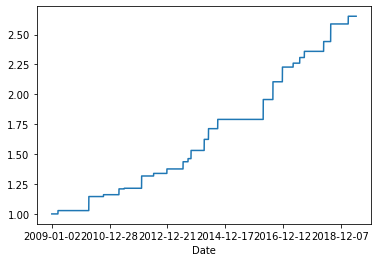

In [20]:
import matplotlib.pyplot as plt
book['acc return'].plot()

# 듀얼 모멘텀 전략

In [21]:
read_df = pd.read_csv('../SPY.csv')
read_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,26.706757,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.896694,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.953669,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,27.238594,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,27.352570,531500


In [22]:
price_df = read_df.loc[:,['Date','Adj Close']].copy()
price_df.head()

,Date,Adj Close
0,1993-01-29,26.706757
1,1993-02-01,26.896694
2,1993-02-02,26.953669
3,1993-02-03,27.238594
4,1993-02-04,27.352570


In [23]:
import datetime
price_df['STD_YM'] = price_df['Date'].map(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m'))
price_df.head()

,Date,Adj Close,STD_YM
0,1993-01-29,26.706757,1993-01
1,1993-02-01,26.896694,1993-02
2,1993-02-02,26.953669,1993-02
3,1993-02-03,27.238594,1993-02
4,1993-02-04,27.352570,1993-02


In [24]:
month_list = price_df['STD_YM'].unique()
month_last_df = pd.DataFrame()
for m in month_list:
    # 기준년월에 맞는 인덱스의 가장 마지막 날짜 row를 데이터 프레임에 추가한다
    month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM'] == m].index[-1]\
                                                       , : ]
                                        )

In [25]:
month_last_df.set_index(['Date'],inplace=True)
month_last_df.head()

,Adj Close,STD_YM
Date,,
1993-01-29,26.706757,1993-01
1993-02-26,26.991682,1993-02
1993-03-31,27.596252,1993-03
1993-04-30,26.890142,1993-04
1993-05-28,27.615356,1993-05


In [26]:
month_last_df['BF_1M_Adj Close'] = month_last_df.shift(1)['Adj Close']
month_last_df['BF_12M_Adj Close'] = month_last_df.shift(12)['Adj Close']
month_last_df.fillna(0,inplace=True)
month_last_df.head(15)

,Adj Close,STD_YM,BF_1M_Adj Close,BF_12M_Adj Close
Date,,,,
1993-01-29,26.706757,1993-01,0.000000,0.000000
1993-02-26,26.991682,1993-02,26.706757,0.000000
1993-03-31,27.596252,1993-03,26.991682,0.000000
1993-04-30,26.890142,1993-04,27.596252,0.000000
1993-05-28,27.615356,1993-05,26.890142,0.000000
1993-06-30,27.714964,1993-06,27.615356,0.000000
1993-07-30,27.580431,1993-07,27.714964,0.000000
1993-08-31,28.637531,1993-08,27.580431,0.000000
1993-09-30,28.429131,1993-09,28.637531,0.000000


In [27]:
book = price_df.copy()
book.set_index(['Date'],inplace=True)
book['trade']=''
book.head()

,Adj Close,STD_YM,trade
Date,,,
1993-01-29,26.706757,1993-01,
1993-02-01,26.896694,1993-02,
1993-02-02,26.953669,1993-02,
1993-02-03,27.238594,1993-02,
1993-02-04,27.352570,1993-02,


In [28]:
#trading 부분.
ticker = 'SPY'
for x in month_last_df.index:
    signal = ''
    # 절대 모멘텀을 계산한다. 
    momentum_index = month_last_df.loc[x,'BF_1M_Adj Close'] / month_last_df.loc[x,'BF_12M_Adj Close'] -1
    # 절대 모멘텀 지표 True / False를 판단한다.
    flag = True if ((momentum_index > 0.0) and (momentum_index != np.inf) and (momentum_index != -np.inf))\
    else False \
    and True
    if flag :
        signal = 'buy ' + ticker # 절대 모멘텀 지표가 Positive이면 매수 후 보유.
    print('날짜 : ',x,' 모멘텀 인덱스 : ',momentum_index, 'flag : ',flag ,'signal : ',signal)
    book.loc[x:,'trade'] = signal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


날짜 :  1993-01-29  모멘텀 인덱스 :  nan flag :  False signal :  
날짜 :  1993-02-26  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-03-31  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-04-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-05-28  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-06-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-07-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-08-31  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-09-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-10-29  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-11-30  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1993-12-31  모멘텀 인덱스 :  inf flag :  False signal :  
날짜 :  1994-01-31  모멘텀 인덱스 :  0.08709114326385636 flag :  True signal :  buy SPY
날짜 :  1994-02-28  모멘텀 인덱스 :  0.1131289632117034 flag :  True signal :  buy SPY
날짜 :  1994-03-31  모멘텀 인덱스 :  0.05699081889816027 flag :  True signal :  buy SPY
날짜 :  1994-04-29  모멘텀 인덱스 :  0.03929402827251738 flag :  True sig

날짜 :  2008-07-31  모멘텀 인덱스 :  -0.10403969762860577 flag :  False signal :  
날짜 :  2008-08-29  모멘텀 인덱스 :  -0.12334011966872827 flag :  False signal :  
날짜 :  2008-09-30  모멘텀 인덱스 :  -0.14297222131440768 flag :  False signal :  
날짜 :  2008-10-31  모멘텀 인덱스 :  -0.23407228558454973 flag :  False signal :  
날짜 :  2008-11-28  모멘텀 인덱스 :  -0.33482968335384367 flag :  False signal :  
날짜 :  2008-12-31  모멘텀 인덱스 :  -0.3740819216350141 flag :  False signal :  
날짜 :  2009-01-30  모멘텀 인덱스 :  -0.3272760819874664 flag :  False signal :  
날짜 :  2009-02-27  모멘텀 인덱스 :  -0.3661359941825554 flag :  False signal :  
날짜 :  2009-03-31  모멘텀 인덱스 :  -0.4291389876228947 flag :  False signal :  
날짜 :  2009-04-30  모멘텀 인덱스 :  -0.40971495248502554 flag :  False signal :  
날짜 :  2009-05-29  모멘텀 인덱스 :  -0.36073556053304867 flag :  False signal :  
날짜 :  2009-06-30  모멘텀 인덱스 :  -0.2616610957669585 flag :  False signal :  
날짜 :  2009-07-31  모멘텀 인덱스 :  -0.2554546845367992 flag :  False signal :  
날짜 :  2009-08-31  모멘텀 인덱스 :  -0

In [29]:
def returns(book, ticker):
    # 손익 계산
    rtn = 1.0
    book['return'] = 1
    buy = 0.0
    sell = 0.0
    for i in book.index:
        if book.loc[i, 'trade'] == 'buy '+ ticker and book.shift(1).loc[i,'trade'] == '' :     # long 진입
            buy = book.loc[i, 'Adj Close']
            print('진입일 : ',i, 'long 진입가격 : ', buy)
        elif book.loc[i, 'trade'] == 'buy '+ ticker and book.shift(1).loc[i,'trade'] == 'buy '+ ticker :
            # 보유중  
            current = book.loc[i, 'Adj Close']
            rtn = (current - buy) / buy + 1
            book.loc[i, 'return'] = rtn
            
        elif book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy '+ticker:     # long 청산
            sell = book.loc[i, 'Adj Close']
            rtn = (sell - buy) / buy + 1 # 손익 계산
            book.loc[i, 'return'] = rtn
            print('청산일 : ',i, 'long 진입가격 : ', buy, ' |  long 청산가격 : ', \
                  sell, ' | return:', round(rtn, 4))

        if book.loc[i, 'trade'] == '':     # zero position
            buy = 0.0
            sell = 0.0
            current = 0.0

    acc_rtn = 1.0
    for i in book.index:
        if book.loc[i, 'trade'] == '' and book.shift(1).loc[i, 'trade'] == 'buy '+ticker:     # long 청산시
            rtn = book.loc[i, 'return']
            acc_rtn = acc_rtn * rtn # 누적수익률 계산
            book.loc[i:, 'acc return'] = acc_rtn

    print ('Accunulated return :', round(acc_rtn, 4))
    return (round(acc_rtn, 4))

In [30]:
returns(book,ticker)

진입일 :  1994-01-31 long 진입가격 :  30.045222999999996
청산일 :  1994-12-30 long 진입가격 :  30.045222999999996  |  long 청산가격 :  29.148033  | return: 0.9701
진입일 :  1995-02-28 long 진입가격 :  31.357141
청산일 :  2000-12-29 long 진입가격 :  31.357141  |  long 청산가격 :  92.002388  | return: 2.934
진입일 :  2001-02-28 long 진입가격 :  86.926689
청산일 :  2001-03-30 long 진입가격 :  86.926689  |  long 청산가격 :  82.055542  | return: 0.944
진입일 :  2003-07-31 long 진입가격 :  72.26248199999999
청산일 :  2008-02-29 long 진입가격 :  72.26248199999999  |  long 청산가격 :  105.568001  | return: 1.4609
진입일 :  2009-10-30 long 진입가격 :  85.141289
청산일 :  2011-10-31 long 진입가격 :  85.141289  |  long 청산가격 :  107.309486  | return: 1.2604
진입일 :  2011-11-30 long 진입가격 :  106.873421
청산일 :  2012-01-31 long 진입가격 :  106.873421  |  long 청산가격 :  112.998047  | return: 1.0573
진입일 :  2012-02-29 long 진입가격 :  117.902817
청산일 :  2015-10-30 long 진입가격 :  117.902817  |  long 청산가격 :  193.002396  | return: 1.637
진입일 :  2015-11-30 long 진입가격 :  193.707825
청산일 :  2016-02-29 long 진입가격 : 

10.9953

In [31]:
book.tail()

,Adj Close,STD_YM,trade,return,acc return
Date,,,,,
2019-06-18,290.984741,2019-06,buy SPY,1.053854,10.995336
2019-06-19,291.641541,2019-06,buy SPY,1.056232,10.995336
2019-06-20,294.427979,2019-06,buy SPY,1.066324,10.995336
2019-06-21,294.000000,2019-06,buy SPY,1.064774,10.995336
2019-06-24,293.640015,2019-06,buy SPY,1.063470,10.995336


# 상대모멘텀 계산

 절대모멘텀 부분에서 월별 수익률을 구한다. pandas pct_change()이거보다는 같은 월별로 묶어서 월초부터 월말까지의 수익률을 구해서 월말로 데이터 프레임을 자른다.
 궁극적으로는 월말 수익률로 피봇해서 볼거다. STD_YM은 key 역할을 하는거고 date를 이용해야겠다.

작업 순서 구상
1)월초부터 월말까지의 수익률을 구해서 월말로 데이터 프레임을 자른다.
2)월말의 수익률 높은순으로 자르고, (0)
3)자른 종목에만 투자했을 때 얻는 수익률 long-only로 하면 좋겠다.(0)
4)나온 종목들에 대해서 (다음달 월초)에 매수 후 보유 및 월말에 없어지면 매도(당월). 

듀얼모멘텀은
이렇게 상대모멘텀 순으로 나온것 중에서,
이제 절대 모멘텀 진짜 몇 개월 전보다 좋은건지 확인하는 것이다.(겹치는 조건(And 조건)으로 종목 필터링)    

In [32]:
import os
import glob

files = glob.glob('../*.csv')

In [33]:
def data_preprocessing(sample, ticker, base_date):
    sample['CODE']=ticker
    sample = sample[sample['Date'] >= base_date][['Date','CODE','Adj Close']].copy()
    
    sample.reset_index(inplace=True,drop=True)
    sample['STD_YM'] = sample['Date'].map(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m'))
    sample['1M_RET'] = 0.0
    ym_keys = list(sample['STD_YM'].unique())
    return sample,ym_keys

In [34]:
month_last_df = pd.DataFrame(columns=['Date','CODE','1M_RET'])
stock_df = pd.DataFrame(columns=['Date','CODE','Adj Close'])

for file in files:
    if os.path.isdir(file):
        print('%s <DIR> '%file)
    else:
        folder, name = os.path.split(file)
        head,tail = os.path.splitext(name)
        print(file)
        read_df = pd.read_csv(file)
        # 데이터가공
        price_df, ym_keys = data_preprocessing(read_df,head,base_date='2010-01-02')
        #가공한 데이터 붙이기
        stock_df = stock_df.append(price_df.loc[:,['Date','CODE','Adj Close']],sort = False)
        # 월별 상대모멘텀 계산을 위한 1개월간 수익률 계산
        for ym in ym_keys:
            # 달 마지막날 가격 / 달 첫 날 가격
            m_ret = price_df.loc[price_df[price_df['STD_YM']==ym].index[-1],'Adj Close'] / price_df.loc[price_df[price_df['STD_YM']==ym].index[0],'Adj Close']
            price_df.loc[price_df['STD_YM']==ym,['1M_RET']] = m_ret
            month_last_df = month_last_df.append(price_df.loc[price_df[price_df['STD_YM']==ym].index[-1],['Date','CODE','1M_RET']])
            

C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\AAPL.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\AMZN.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\BND.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\GDX.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\GLD.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\GM.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\MSFT.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\SLV.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\SPY.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\USM.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_data\USO.csv
C:/Users/oymin/OneDrive/바탕 화면/파이썬-머신러닝/퀸트/algoTrade-master/data/us_etf_dat

In [35]:
month_last_df.head()

,Date,CODE,1M_RET
18,2010-01-29,AAPL,0.897435
37,2010-02-26,AAPL,1.050789
60,2010-03-31,AAPL,1.124456
81,2010-04-30,AAPL,1.106454
101,2010-05-28,AAPL,0.964445


In [36]:
# 상대 모멘텀 수익률 필터링
month_ret_df = month_last_df.pivot('Date','CODE','1M_RET').copy()
# 투자 종목을 선택할 rank
month_ret_df = month_ret_df.rank(axis=1,ascending=False,method='max',pct=True)
# 상위 40%에 드는 종목들만 신호 목록
month_ret_df = month_ret_df.where(month_ret_df < 0.4 , np.nan)
month_ret_df.fillna(0,inplace=True)
month_ret_df[month_ret_df != 0] = 1
stock_codes = list(stock_df['CODE'].unique())

In [37]:
month_ret_df.head()

CODE,AAPL,AMZN,BND,GDX,GLD,GM,MSFT,SLV,SPY,USM,USO,WMT
Date,,,,,,,,,,,,
2010-01-29,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2010-02-26,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2010-03-31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2010-04-30,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2010-05-28,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
# p : 포지션 , r: 수익률 표기
def create_trade_book(sample, sample_codes):
    book = pd.DataFrame()
    book = sample[sample_codes].copy()
    book['STD_YM'] = book.index.map(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m'))
    for c in sample_codes:
        book['p '+c] = ''
        book['r '+c] = ''
    return book

In [39]:
# 상대모멘텀 tradings
def tradings(book, s_codes):
    std_ym = ''
    buy_phase = False
    # 종목코드별 순회
    for s in s_codes : 
        print(s)
        # 종목코드 인덱스 순회
        for i in book.index:
            # 해당 종목코드 포지션을 잡아준다. 
            if book.loc[i,'p '+s] == '' and book.shift(1).loc[i,'p '+s] == 'ready ' + s:
                std_ym = book.loc[i,'STD_YM']
                buy_phase = True
            # 해당 종목코드에서 신호가 잡혀있으면 매수상태를 유지한다.
            if book.loc[i,'p '+s] == '' and book.loc[i,'STD_YM'] == std_ym and buy_phase == True : 
                book.loc[i,'p '+s] = 'buy ' + s
            
            if book.loc[i,'p '+ s] == '' :
                std_ym = None
                buy_phase = False
    return book

In [40]:
def multi_returns(book, s_codes):
    # 손익 계산
    rtn = 1.0
    buy_dict = {}
    num = len(s_codes)
    sell_dict = {}
    
    for i in book.index:
        for s in s_codes:
            if book.loc[i, 'p ' + s] == 'buy '+ s and \
            book.shift(1).loc[i, 'p '+s] == 'ready '+s and \
            book.shift(2).loc[i, 'p '+s] == '' :     # long 진입
                buy_dict[s] = book.loc[i, s]
            
            elif book.loc[i, 'p '+ s] == '' and book.shift(1).loc[i, 'p '+s] == 'buy '+ s:     # long 청산
                sell_dict[s] = book.loc[i, s]
                # 손익 계산
                rtn = (sell_dict[s] / buy_dict[s]) -1
                book.loc[i, 'r '+s] = rtn
                print('개별 청산일 : ',i,' 종목코드 : ', s , 'long 진입가격 : ', buy_dict[s], ' |  long 청산가격 : ',\
                      sell_dict[s],' | return:', round(rtn * 100, 2),'%') # 수익률 계산.
            if book.loc[i, 'p '+ s] == '':     # zero position || long 청산.
                buy_dict[s] = 0.0
                sell_dict[s] = 0.0


    acc_rtn = 1.0        
    for i in book.index:
        rtn  = 0.0
        count = 0
        for s in s_codes:
            if book.loc[i, 'p '+ s] == '' and book.shift(1).loc[i,'p '+ s] == 'buy '+ s: 
                # 청산 수익률계산.
                count += 1
                rtn += book.loc[i, 'r '+s]
        if (rtn != 0.0) & (count != 0) :
            acc_rtn *= (rtn /count )  + 1
            print('누적 청산일 : ',i,'청산 종목수 : ',count, \
                  '청산 수익률 : ',round((rtn /count),4),'누적 수익률 : ' ,round(acc_rtn, 4)) # 수익률 계산.
        book.loc[i,'acc_rtn'] = acc_rtn
    print ('누적 수익률 :', round(acc_rtn, 4))

In [41]:
# 3단계. signal list로 trading + positioning
sig_dict = dict()
for date in month_ret_df.index:
    # 신호가 포착된 종목코드만 읽어온다.
    ticker_list = list(month_ret_df.loc[date,month_ret_df.loc[date,:] >= 1.0].index)
    # 날짜별 종목코드 저장
    sig_dict[date] = ticker_list
stock_c_matrix = stock_df.pivot('Date','CODE','Adj Close').copy()
book = create_trade_book(stock_c_matrix, list(stock_df['CODE'].unique()))

# positioning
for date,values in sig_dict.items():
    for stock in values:
        book.loc[date,'p '+ stock] = 'ready ' + stock
        
# 3-2  tradings
book = tradings(book, stock_codes)

# 4 단게. 수익률 계산하기.
multi_returns(book, stock_codes)

AAPL
AMZN
BND
GDX
GLD
GM
MSFT
SLV
SPY
USM
USO
WMT
개별 청산일 :  2010-03-01  종목코드 :  BND long 진입가격 :  61.280487  |  long 청산가격 :  61.585163  | return: 0.5 %
개별 청산일 :  2010-03-01  종목코드 :  GLD long 진입가격 :  108.349998  |  long 청산가격 :  109.43  | return: 1.0 %
개별 청산일 :  2010-03-01  종목코드 :  WMT long 진입가격 :  42.12096  |  long 청산가격 :  42.451756  | return: 0.79 %
개별 청산일 :  2010-04-01  종목코드 :  GDX long 진입가격 :  42.019034999999995  |  long 청산가격 :  43.675705  | return: 3.94 %
개별 청산일 :  2010-04-01  종목코드 :  SPY long 진입가격 :  90.14580500000001  |  long 청산가격 :  97.770996  | return: 8.46 %
개별 청산일 :  2010-04-01  종목코드 :  USO long 진입가격 :  38.349998  |  long 청산가격 :  41.240002000000004  | return: 7.54 %
개별 청산일 :  2010-05-03  종목코드 :  AMZN long 진입가격 :  131.809998  |  long 청산가격 :  137.490005  | return: 4.31 %
개별 청산일 :  2010-05-03  종목코드 :  SLV long 진입가격 :  17.540001  |  long 청산가격 :  18.42  | return: 5.02 %
개별 청산일 :  2010-05-03  종목코드 :  USM long 진입가격 :  36.212452  |  long 청산가격 :  36.744232000000004  | return: 1.47 %
개별 

개별 청산일 :  2012-08-01  종목코드 :  AMZN long 진입가격 :  229.32000699999998  |  long 청산가격 :  232.08999599999999  | return: 1.21 %
개별 청산일 :  2012-08-01  종목코드 :  MSFT long 진입가격 :  25.711756  |  long 청산가격 :  24.744194  | return: -3.76 %
개별 청산일 :  2012-08-01  종목코드 :  SPY long 진입가격 :  118.590034  |  long 청산가격 :  119.528236  | return: 0.79 %
개별 청산일 :  2012-09-04  종목코드 :  USM long 진입가격 :  34.797234  |  long 청산가격 :  32.481419  | return: -6.66 %
개별 청산일 :  2012-09-04  종목코드 :  USO long 진입가격 :  33.169998  |  long 청산가격 :  35.509997999999996  | return: 7.05 %
개별 청산일 :  2012-09-04  종목코드 :  WMT long 진입가격 :  54.992363  |  long 청산가격 :  62.003403000000006  | return: 12.75 %
개별 청산일 :  2012-10-01  종목코드 :  AAPL long 진입가격 :  75.94046  |  long 청산가격 :  82.874992  | return: 9.13 %
개별 청산일 :  2012-11-01  종목코드 :  GLD long 진입가격 :  172.28999299999998  |  long 청산가격 :  166.070007  | return: -3.61 %
개별 청산일 :  2012-11-01  종목코드 :  SLV long 진입가격 :  31.360001  |  long 청산가격 :  31.219998999999998  | return: -0.45 %
개별 청산일 :  2012-12-

개별 청산일 :  2015-03-02  종목코드 :  AMZN long 진입가격 :  364.47000099999997  |  long 청산가격 :  385.660004  | return: 5.81 %
개별 청산일 :  2015-03-02  종목코드 :  GDX long 진입가격 :  21.90139  |  long 청산가격 :  20.252691  | return: -7.53 %
개별 청산일 :  2015-03-02  종목코드 :  GLD long 진입가격 :  122.41999799999999  |  long 청산가격 :  115.68  | return: -5.51 %
개별 청산일 :  2015-03-02  종목코드 :  SLV long 진입가격 :  16.469998999999998  |  long 청산가격 :  15.66  | return: -4.92 %
개별 청산일 :  2015-04-01  종목코드 :  AAPL long 진입가격 :  119.88951899999999  |  long 청산가격 :  115.394478  | return: -3.75 %
개별 청산일 :  2015-04-01  종목코드 :  MSFT long 진입가격 :  39.941555  |  long 청산가격 :  37.065178  | return: -7.2 %
개별 청산일 :  2015-04-01  종목코드 :  USM long 진입가격 :  37.740002000000004  |  long 청산가격 :  36.419998  | return: -3.5 %
개별 청산일 :  2015-05-01  종목코드 :  BND long 진입가격 :  74.701561  |  long 청산가격 :  73.93969  | return: -1.02 %
개별 청산일 :  2015-05-01  종목코드 :  GM long 진입가격 :  30.781675  |  long 청산가격 :  29.227293  | return: -5.05 %
개별 청산일 :  2015-05-01  종목코드 :  SLV lo

개별 청산일 :  2017-10-02  종목코드 :  AAPL long 진입가격 :  159.74168400000002  |  long 청산가격 :  149.770599  | return: -6.24 %
개별 청산일 :  2017-10-02  종목코드 :  GDX long 진입가격 :  22.52808  |  long 청산가격 :  22.745171  | return: 0.96 %
개별 청산일 :  2017-10-02  종목코드 :  SLV long 진입가격 :  16.73  |  long 청산가격 :  15.67  | return: -6.34 %
개별 청산일 :  2017-11-01  종목코드 :  GM long 진입가격 :  34.141644  |  long 청산가격 :  40.226833  | return: 17.82 %
개별 청산일 :  2017-11-01  종목코드 :  SPY long 진입가격 :  244.089783  |  long 청산가격 :  249.09111000000001  | return: 2.05 %
개별 청산일 :  2017-11-01  종목코드 :  USO long 진입가격 :  10.21  |  long 청산가격 :  10.9  | return: 6.76 %
개별 청산일 :  2017-12-01  종목코드 :  AAPL long 진입가격 :  162.507095  |  long 청산가격 :  167.156601  | return: 2.86 %
개별 청산일 :  2017-12-01  종목코드 :  MSFT long 진입가격 :  72.395599  |  long 청산가격 :  82.169785  | return: 13.5 %
개별 청산일 :  2018-01-02  종목코드 :  AMZN long 진입가격 :  1103.680054  |  long 청산가격 :  1189.01001  | return: 7.73 %
개별 청산일 :  2018-01-02  종목코드 :  USM long 진입가격 :  37.810001  |  long 청산가

누적 청산일 :  2013-02-01 청산 종목수 :  1 청산 수익률 :  0.3219 누적 수익률 :  2.6904
누적 청산일 :  2013-03-01 청산 종목수 :  3 청산 수익률 :  0.0039 누적 수익률 :  2.701
누적 청산일 :  2013-04-01 청산 종목수 :  2 청산 수익률 :  0.0114 누적 수익률 :  2.7317
누적 청산일 :  2013-05-01 청산 종목수 :  3 청산 수익률 :  0.0392 누적 수익률 :  2.8387
누적 청산일 :  2013-06-03 청산 종목수 :  1 청산 수익률 :  0.0578 누적 수익률 :  3.0028
누적 청산일 :  2013-07-01 청산 종목수 :  2 청산 수익률 :  0.092 누적 수익률 :  3.2792
누적 청산일 :  2013-08-01 청산 종목수 :  2 청산 수익률 :  0.0711 누적 수익률 :  3.5123
누적 청산일 :  2013-09-03 청산 종목수 :  2 청산 수익률 :  0.2142 누적 수익률 :  4.2646
누적 청산일 :  2013-10-01 청산 종목수 :  4 청산 수익률 :  -0.0515 누적 수익률 :  4.0451
누적 청산일 :  2013-11-01 청산 종목수 :  1 청산 수익률 :  0.0412 누적 수익률 :  4.2118
누적 청산일 :  2013-12-02 청산 종목수 :  1 청산 수익률 :  -0.0473 누적 수익률 :  4.0124
누적 청산일 :  2014-01-02 청산 종목수 :  4 청산 수익률 :  0.1008 누적 수익률 :  4.4171
누적 청산일 :  2014-02-03 청산 종목수 :  3 청산 수익률 :  -0.0595 누적 수익률 :  4.1542
누적 청산일 :  2014-03-03 청산 종목수 :  3 청산 수익률 :  0.0113 누적 수익률 :  4.201
누적 청산일 :  2014-04-01 청산 종목수 :  4 청산 수익률 :  -0.0058 누적 수익률 :  4

In [42]:
book.loc['2012-01-27':'2012-03-01',['AAPL','p AAPL','r AAPL']]

CODE,AAPL,p AAPL,r AAPL
Date,,,
2012-01-27,55.975765,buy AAPL,
2012-01-30,56.692860,buy AAPL,
2012-01-31,57.127102,ready AAPL,
2012-02-01,57.090816,buy AAPL,
2012-02-02,56.956921,buy AAPL,
2012-02-03,57.527580,buy AAPL,
2012-02-06,58.064457,buy AAPL,
2012-02-07,58.672680,buy AAPL,
2012-02-08,59.655083,buy AAPL,


In [43]:
book.tail()

CODE,AAPL,AMZN,BND,GDX,GLD,GM,MSFT,SLV,SPY,USM,...,r SLV,p SPY,r SPY,p USM,r USM,p USO,r USO,p WMT,r WMT,acc_rtn
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-18,198.449997,1901.369995,82.397118,23.670000,127.120003,36.700001,135.160004,14.0500,290.984741,50.540001,...,,,,,,,,buy WMT,,7.506747
2019-06-19,197.869995,1908.790039,82.676468,24.000000,127.889999,36.779999,135.690002,14.1700,291.641541,50.040001,...,,,,,,,,buy WMT,,7.506747
2019-06-20,199.460007,1918.189941,82.806168,25.049999,131.110001,36.959999,136.949997,14.4500,294.427979,49.320000,...,,,,,,,,buy WMT,,7.506747
2019-06-21,198.779999,1911.300049,82.576698,25.209999,131.979996,36.919998,136.970001,14.3600,294.000000,48.330002,...,,,,,,,,buy WMT,,7.506747
2019-06-24,199.169998,1907.953857,82.726349,25.703501,133.501907,36.814999,138.289993,14.4329,293.640015,47.750000,...,,,,,,,,buy WMT,,7.506747


# 마법의 공식

## 총자산 수익률(ROA), 주가 수익률(PER) 이용
 ROA가 높은 순으로 정렬해 우량한 주식을 결정하고 , PER이 낮은 순으로 정렬해 저렴한 주식을 결정한다. 이 2개의 지표 순위를 합산해 최종적으로 저렴하고 유량한 종목을 찾는다.

In [44]:
import FinanceDataReader as fdr
krx_df = fdr.StockListing('KRX')
krx_df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [45]:
df = pd.read_csv('../PER_ROA.csv',engine='python')
df.head()

,종목명,현재가,전일비,등락률,액면가,거래량,시가총액,영업이익,PER,ROA
0,삼성전자,43950,100,-0.23%,100,4637815,2623719,588867.0,7.30,13.83
1,SK하이닉스,74400,600,0.81%,5000,1673056,541634,208438.0,3.49,28.49
2,삼성전자우,36350,350,-0.95%,100,553133,299119,NaN,6.03,NaN
3,현대차,126000,2000,1.61%,5000,252713,269222,24222.0,23.54,0.92
4,NAVER,148500,500,0.34%,100,367244,244748,9425.0,37.72,7.02


In [6]:
import csv
line_list = []
with open('../PER_ROA.csv') as csv_file:
    csv_reader = csv.reader(csv_file,delimiter=',')
    for row in csv_reader:
        if '' in row:
            pass
        else:
            line_list.append(row)

df = pd.DataFrame(data=line_list[1:],columns=line_list[0])
df.head()

,종목명,현재가,전일비,등락률,액면가,거래량,시가총액,영업이익,PER,ROA
0,삼성전자,43950,100,-0.23%,100,4637815,2623719,588867,7.3,13.83
1,SK하이닉스,74400,600,0.81%,5000,1673056,541634,208438,3.49,28.49
2,현대차,126000,2000,1.61%,5000,252713,269222,24222,23.54,0.92
3,NAVER,148500,500,0.34%,100,367244,244748,9425,37.72,7.02
4,LG화학,329500,9500,2.97%,5000,176590,232602,22461,17.52,5.63


In [7]:
df = df[~df.isin([np.nan,np.inf,-np.inf]).any(1)]
df.head()

,종목명,현재가,전일비,등락률,액면가,거래량,시가총액,영업이익,PER,ROA
0,삼성전자,43950,100,-0.23%,100,4637815,2623719,588867,7.3,13.83
1,SK하이닉스,74400,600,0.81%,5000,1673056,541634,208438,3.49,28.49
2,현대차,126000,2000,1.61%,5000,252713,269222,24222,23.54,0.92
3,NAVER,148500,500,0.34%,100,367244,244748,9425,37.72,7.02
4,LG화학,329500,9500,2.97%,5000,176590,232602,22461,17.52,5.63


In [8]:
def sort_value(s_value,asc=True,standard=0):
    # 음수 값을 제거
    s_value_mask = s_value.mask(s_value < standard, np.nan)
    s_value_mask_rank = s_value_mask.rank(ascending=asc, na_option='bottom')
    return s_value_mask_rank

per = pd.to_numeric(df['PER'])
roa = pd.to_numeric(df['ROA'])

per_rank = sort_value(per)
roa_rank = sort_value(roa,asc=False)

In [9]:
per_rank.head()

0    139.0
1     22.0
2    424.0
3    487.0
4    367.0
Name: PER, dtype: float64

In [10]:
roa_rank.head()

0     18.0
1      5.0
2    478.5
3    103.0
4    149.0
Name: ROA, dtype: float64

In [11]:
result_rank = per_rank + roa_rank   # PER 순위 ROA 순위 합산
result_rank = sort_value(result_rank, asc=True)  # 합산 순위 정렬
result_rank = result_rank.where(result_rank <= 10, 0)  # 합산 순위 필터링
result_rank = result_rank.mask(result_rank > 0, 1)  # 순위 제거
result_rank.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [12]:
result_rank.sum()

10.0

In [13]:
mf_df = df.loc[result_rank==1.0,['종목명','시가총액']].copy()
mf_stock_list = df.loc[result_rank==1.0,'종목명'].values
mf_df

,종목명,시가총액
1,SK하이닉스,541634
100,효성,18353
175,대한유화,7508
176,HDC,7468
310,한일홀딩스,2904
322,신대양제지,2756
372,세아제강지주,2044
394,SIMPAC,1835
408,케이씨,1694
726,에쓰씨엔지니어링,354


In [14]:
krx_df = fdr.StockListing('KRX')
krx_df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [16]:
mf_df['종목 코드']=''
for stock in mf_stock_list:
    mf_df.loc[mf_df['종목명'] == stock,'종목 코드'] = krx_df[krx_df['Name']==stock]['Symbol'].values
mf_df

,종목명,시가총액,종목 코드
1,SK하이닉스,541634,000660
100,효성,18353,004800
175,대한유화,7508,006650
176,HDC,7468,012630
310,한일홀딩스,2904,003300
322,신대양제지,2756,016590
372,세아제강지주,2044,003030
394,SIMPAC,1835,009160
408,케이씨,1694,029460
726,에쓰씨엔지니어링,354,023960


In [19]:
mf_df['2019_수익률'] = ''
for x in mf_df['종목 코드'].values :
    df = fdr.DataReader(x,'2019-01-01','2019-12-31')
    #2019 누적 수익률 계산
    cum_ret = df.loc[df.index[-1],'Close'] / df.loc[df.index[0],'Close'] - 1
    mf_df.loc[mf_df['종목 코드']==x,'2019_수익률'] = cum_ret
    df = None
mf_df

,종목명,시가총액,종목 코드,2019_수익률
1,SK하이닉스,541634,000660,0.552805
100,효성,18353,004800,0.649635
175,대한유화,7508,006650,-0.20339
176,HDC,7468,012630,-0.332326
310,한일홀딩스,2904,003300,-0.197441
322,신대양제지,2756,016590,0.0347826
372,세아제강지주,2044,003030,-0.0083682
394,SIMPAC,1835,009160,0.206967
408,케이씨,1694,029460,0.594017
726,에쓰씨엔지니어링,354,023960,-0.0620915


In [21]:
for idx,val in enumerate(mf_df['종목 코드'].values):
    code_name = mf_df.loc[mf_df['종목 코드'] == val,'종목명'].values[0]
    print(val,code_name)
    df = fdr.DataReader(val,'2019-01-01','2019-12-31')
    if idx==0:
        # 첫번째 종목 코드 인덱스 활용한 데이터프레임 생성
        mf_df_rtn = pd.DataFrame(index=df.index)
    df['daily_rtn'] = df['Close'].pct_change(periods=1)
    df['cum_rtn'] =(1+df['daily_rtn']).cumprod()
    tmp = df.loc[:,['cum_rtn']].rename(columns={'cum_rtn':code_name})
    mf_df_rtn = mf_df_rtn.join(tmp,how='left')
    df=None
    
mf_df_rtn.tail()

000660 SK하이닉스
004800 효성
006650 대한유화
012630 HDC
003300 한일홀딩스
016590 신대양제지
003030 세아제강지주
009160 SIMPAC
029460 케이씨
023960 에쓰씨엔지니어링


,SK하이닉스,효성,대한유화,HDC,한일홀딩스,신대양제지,세아제강지주,SIMPAC,케이씨,에쓰씨엔지니어링
Date,,,,,,,,,,
2019-12-23,1.561056,1.722628,0.820339,0.655589,0.814442,1.041739,0.974895,1.192623,1.337607,0.947712
2019-12-24,1.547855,1.747654,0.820339,0.655589,0.804388,1.026087,0.990586,1.178279,1.354701,0.908497
2019-12-26,1.564356,1.758081,0.823729,0.667674,0.820841,1.045217,1.003138,1.192623,1.410256,0.928105
2019-12-27,1.584158,1.660063,0.803390,0.664653,0.800731,1.041739,0.991632,1.200820,1.534188,0.911765
2019-12-30,1.552805,1.649635,0.796610,0.667674,0.802559,1.034783,0.991632,1.206967,1.594017,0.937908
